In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/kaggle/input/steel-plate-fault/faults.csv")

In [10]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1917 non-null   float64
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1911 non-null   float64
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

X_Minimum                 0
X_Maximum                24
Y_Minimum                 0
Y_Maximum                 0
Pixels_Areas              0
X_Perimeter               0
Y_Perimeter               0
Sum_of_Luminosity         0
Minimum_of_Luminosity     0
Maximum_of_Luminosity     0
Length_of_Conveyer        0
TypeOfSteel_A300          0
TypeOfSteel_A400          0
Steel_Plate_Thickness    30
Edges_Index               0
Empty_Index              26
Square_Index              0
Outside_X_Index           0
Edges_X_Index             0
Edges_Y_Index             0
Outside_Global_Index      0
LogOfAreas                0
Log_X_Index               0
Log_Y_Index               0
Orientation_Index         0
Luminosity_Index          0
SigmoidOfAreas            0
target                    0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1869.0,5.555650e+02,5.136231e+02,0.0000,48.0000,3.960000e+02,1.036000e+03,1.705000e+03
X_Maximum,1869.0,6.036619e+02,4.904415e+02,4.0000,191.0000,4.400000e+02,1.055000e+03,1.713000e+03
Y_Minimum,1869.0,1.668209e+06,1.777071e+06,6712.0000,483796.0000,1.246188e+06,2.204696e+06,1.298766e+07
Y_Maximum,1869.0,1.668263e+06,1.777083e+06,6724.0000,483808.0000,1.246244e+06,2.204771e+06,1.298769e+07
Pixels_Areas,1869.0,1.949438e+03,5.252644e+03,2.0000,85.0000,1.760000e+02,8.910000e+02,1.526550e+05
X_Perimeter,1869.0,1.146426e+02,3.063726e+02,2.0000,15.0000,2.700000e+01,9.100000e+01,1.044900e+04
Y_Perimeter,1869.0,8.437721e+01,4.342609e+02,1.0000,13.0000,2.500000e+01,8.700000e+01,1.815200e+04
Sum_of_Luminosity,1869.0,2.124495e+05,5.204126e+05,250.0000,9693.0000,1.945700e+04,8.642400e+04,1.159141e+07
Minimum_of_Luminosity,1869.0,8.453612e+01,3.232878e+01,0.0000,62.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1869.0,1.303553e+02,1.879485e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


In [16]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'target'],
      dtype='object')

In [17]:
print(df.target.unique(),"\n")
print(len(df.target.unique()))

['Pastry' 'Z_Scratch' 'K_Scatch' 'Stains' 'Dirtiness' 'Bumps'
 'Other_Faults'] 

7


In [18]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['target']= label_encoder.fit_transform(df['target']) 

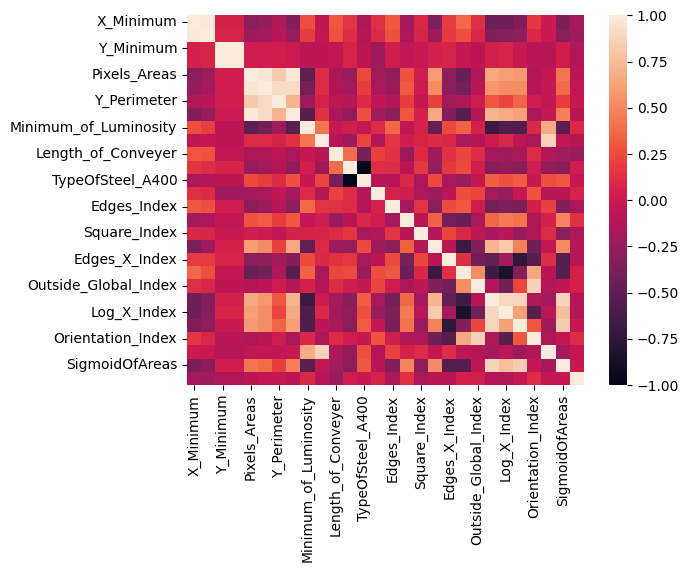

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), annot = False, fmt = '.2f')
plt.show()

In [20]:
Y = df['target']
X = df.drop(['target'],axis=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

In [32]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train,X_test, y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)

In [33]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train) 

RandomForestClassifier()

In [34]:
test_predictions = RFC.predict(X_test) 
print(classification_report(y_test, test_predictions)) 

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       121
           1       0.93      0.81      0.87        16
           2       0.98      0.91      0.94       117
           3       0.68      0.85      0.76       197
           4       0.76      0.52      0.62        31
           5       0.95      0.95      0.95        22
           6       0.92      0.77      0.84        57

    accuracy                           0.79       561
   macro avg       0.86      0.78      0.81       561
weighted avg       0.81      0.79      0.79       561



In [35]:
test_accuracy = accuracy_score(y_test, test_predictions)
print("test accuracy : ", test_accuracy)

test accuracy :  0.7932263814616756


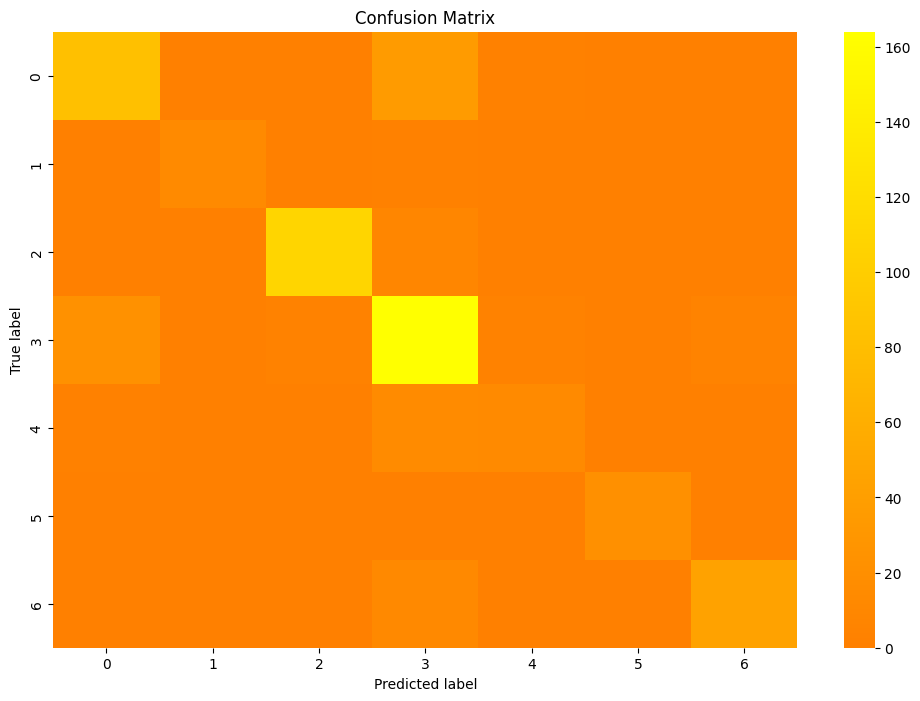

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, test_predictions),annot=False,fmt="d", center=0, cmap='autumn') 
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()